In [1]:
pip install tensorflow keras numpy matplotlib opencv-python scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split


In [11]:
import os
import cv2
import random
import numpy as np

base_path = "TRAIN"
categories = ["O", "R"]
img_size = 64  # Resize to 64x64 for efficiency

data = []
labels = []

for category in categories:
    path = os.path.join(base_path, category)
    class_label = categories.index(category)  # 0 for organic, 1 for recyclable
    
    all_images = os.listdir(path)
    
    # Select 1000 random images per category
    selected_images = random.sample(all_images, min(1000, len(all_images)))

    for img_name in selected_images:
        img_path = os.path.join(path, img_name)
        
        try:
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img = cv2.resize(img, (img_size, img_size))  # Resize
            data.append(img)
            labels.append(class_label)
        except Exception as e:
            print("Error loading image:", img_name, e)

# Convert to NumPy arrays for ML model
data = np.array(data, dtype=np.float32) / 255.0  # Normalize
labels = np.array(labels)

# Shuffle data to mix categories
combined = list(zip(data, labels))
random.shuffle(combined)
data, labels = zip(*combined)
data = np.array(data)
labels = np.array(labels)

print(f"Dataset reduced to {len(data)} images (1000 per category).")


Dataset reduced to 2000 images (1000 per category).


In [12]:
from sklearn.model_selection import train_test_split

# Split dataset into Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 1600, Testing samples: 400


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential([
    # Convolutional layers
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    # Flatten for fully connected layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(2, activation='softmax')  # Output layer (2 classes)
])

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()


c:\Users\jugraj\anaconda3\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,458 (2.61 MB)

 Trainable params: 683,458 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.6220 - loss: 0.6541 - val_accuracy: 0.8025 - val_loss: 0.4656
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.8035 - loss: 0.4565 - val_accuracy: 0.8075 - val_loss: 0.4420
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.7756 - loss: 0.4618 - val_accuracy: 0.8175 - val_loss: 0.4344
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7946 - loss: 0.4522 - val_accuracy: 0.8200 - val_loss: 0.4220
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8267 - loss: 0.3895 - val_accuracy: 0.8125 - val_loss: 0.4244
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8203 - loss: 0.4241 - val_accuracy: 0.8125 - val_loss: 0.4271
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8451 - loss: 0.3694 - val_accuracy: 0.8275 - val_loss: 0.4048
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8452 - loss: 0.3902 - val_accuracy: 0.8300 - v

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8159 - loss: 0.5672
Test Accuracy: 80.50%


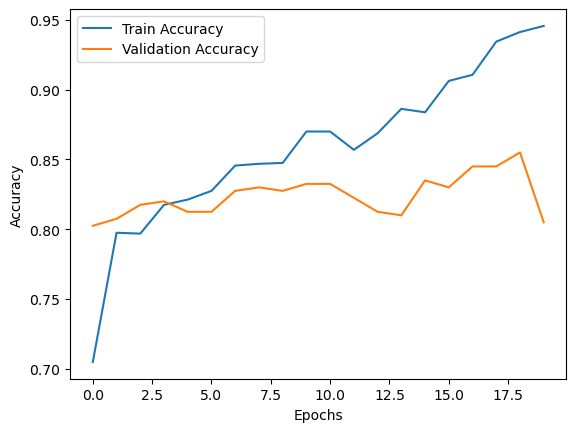

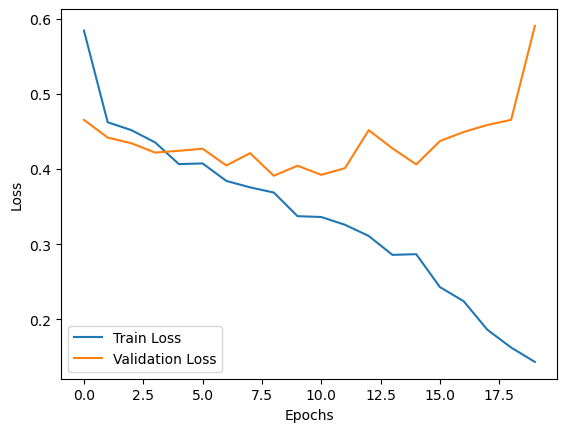

In [16]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
